In [27]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv(f"predator_output_4.csv")

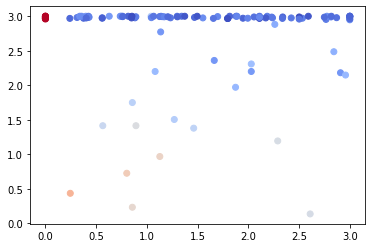

In [28]:
plt.scatter(csv['gamma1'], csv['gamma2'], c=csv['alive'],cmap='coolwarm')
plt.show()

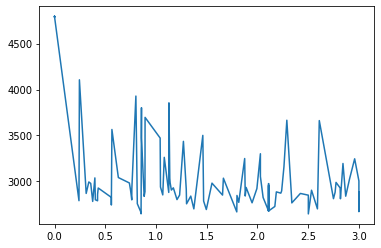

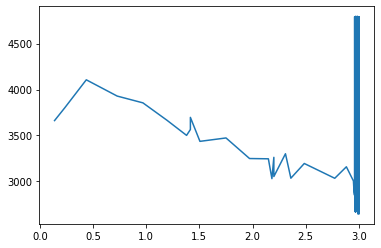

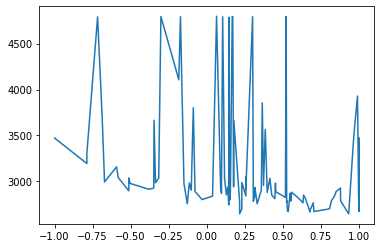

In [29]:
for val in ("gamma1","gamma2","k"):
    csv = csv.sort_values(by=val)
    plt.plot(csv[val], csv['alive'])
    plt.show()

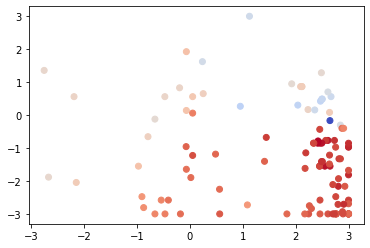

In [30]:
csv = pd.read_csv(f"prey_output_4.csv")
plt.scatter(csv['alpha'], csv['beta'], c=csv['alive'],cmap='coolwarm')
plt.show()

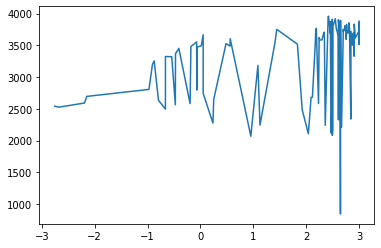

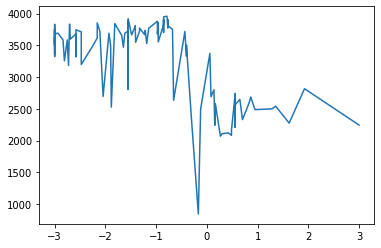

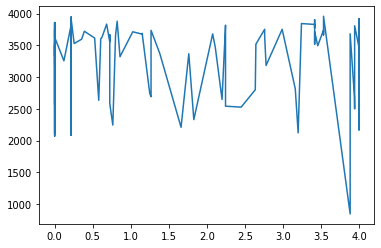

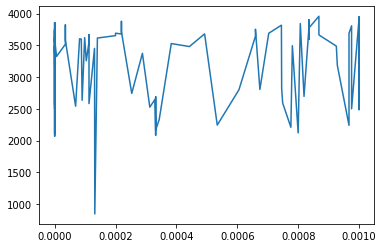

In [31]:
for val in ("alpha","beta","gamma","delta"):
    csv = csv.sort_values(by=val)
    plt.plot(csv[val], csv['alive'])
    plt.show()

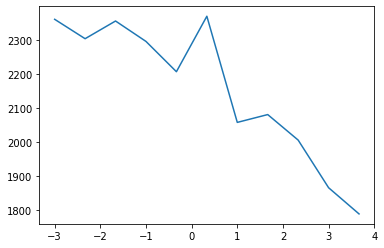

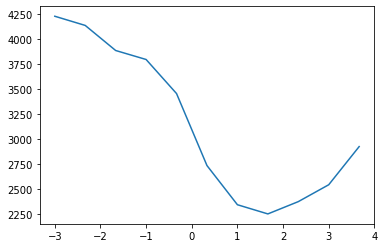

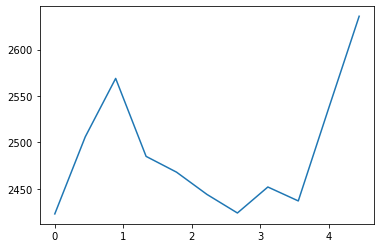

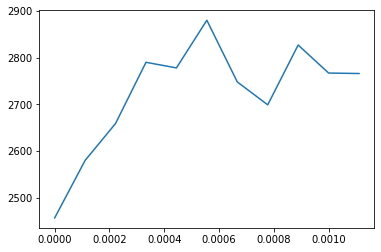

In [32]:
csv = pd.read_csv(f"test_const_prey.csv")
for i,val in enumerate(["alpha","beta","gamma","delta"]):
    temp = csv.loc[i*11:(i+1)*11-1]
    plt.plot(temp[val], temp['alive'])
    plt.show()

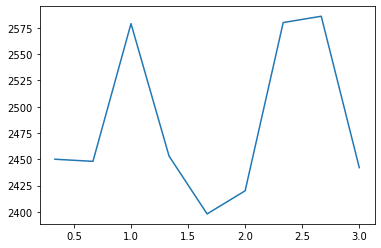

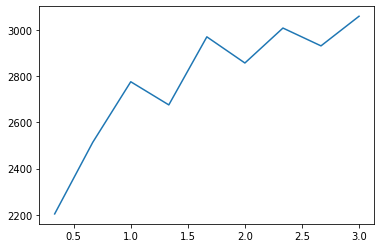

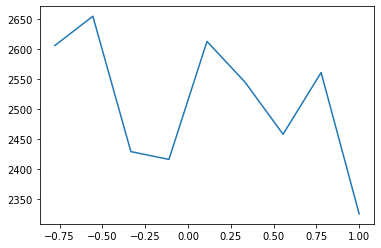

In [33]:
csv = pd.read_csv(f"test_const_predator.csv")
for i,val in enumerate(["gamma1","gamma2","k"]):
    temp = csv.loc[i*10+1:(i+1)*10-1]
    plt.plot(temp[val], temp['alive'])
    plt.show()

In [36]:
iterationCount = 5
for i in range(iterationCount):
    print(f"Prey iteration {i+1}")
    csv = pd.read_csv(f"prey_output_{i}.csv")
    top_alive = csv.sort_values(by='alive', ascending=False).head(10)
    print(top_alive[['alpha','beta','gamma','delta','alive']].describe().loc[['mean', 'std']])
    best = csv.sort_values(by='alive', ascending=False).head(1)
    print(best[['alpha','beta','gamma','delta','alive']])
    print(f"Predator iteration {i+1}")
    csv = pd.read_csv(f"predator_output_{i}.csv")
    top_alive = csv.sort_values(by='alive', ascending=True).head(10)
    print(top_alive[['gamma1','gamma2','k','alive']].describe().loc[['mean', 'std']])
    best = csv.sort_values(by='alive', ascending=True).head(1)
    print(best[['gamma1','gamma2','k','alive']])

Prey iteration 1
         alpha      beta     gamma     delta        alive
mean  1.504950 -1.615021  1.376787  0.000488  4025.300000
std   1.457879  1.040944  1.583616  0.000258    96.670172
      alpha  beta  gamma     delta  alive
46  0.19895  -3.0    0.0  0.000537   4169
Predator iteration 1
        gamma1    gamma2         k        alive
mean  2.472675  1.151200 -0.083158  3674.500000
std   0.535159  0.194169  0.207382    28.833815
     gamma1   gamma2         k  alive
76  2.26748  1.14145 -0.013346   3616
Prey iteration 2
         alpha      beta     gamma     delta        alive
mean  2.918609 -0.868856  2.557437  0.000404  3847.500000
std   0.134488  0.311769  1.258204  0.000411    34.468182
    alpha      beta  gamma     delta  alive
72    3.0 -0.625797    4.0  0.000985   3905
Predator iteration 2
        gamma1    gamma2    k        alive
mean  2.068761  2.956520  1.0  2321.100000
std   0.514550  0.038266  0.0    26.818112
     gamma1   gamma2    k  alive
53  2.43535  2.91895  

In [44]:
iterationCount = 5
prey_fields = ('alpha','beta','gamma','delta')
predator_fields = ('gamma1','gamma2','k')
df = pd.DataFrame()
for i in prey_fields: df[i] = [0 for _ in range(iterationCount)]
for i in predator_fields: df[i] = [0 for _ in range(iterationCount)]
for i in range(iterationCount):
    csv = pd.read_csv(f"prey_output_{i}.csv")
    best = csv.sort_values(by='alive', ascending=False).head(1).iloc[0]
    for j in range(4):
        df.iloc[i,j] = best[j]
    csv = pd.read_csv(f"predator_output_{i}.csv")
    best = csv.sort_values(by='alive', ascending=True).head(1).iloc[0]
    for j in range(4,7):
        df.iloc[i,j] = best[j]
print(df)

      alpha      beta     gamma     delta   gamma1    gamma2         k
0  0.198950 -3.000000  0.000000  0.000537  2.26748  1.141450 -0.013346
1  3.000000 -0.625797  4.000000  0.000985  2.43535  2.918950  1.000000
2  0.379387 -3.000000  0.982979  0.001000  3.00000  0.511407  0.103307
3  0.052739 -3.000000  4.000000  0.000358  3.00000  1.017590  0.840947
4  2.422950 -0.787204  3.533380  0.000868  2.50147  2.989690  0.932715


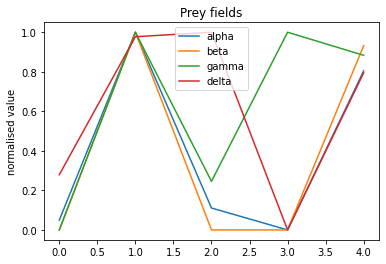

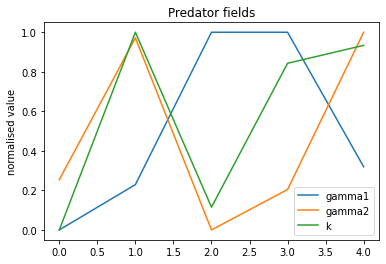

In [48]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

for col in prey_fields:
    plt.plot(normalize(df[col]), label=col)

plt.legend()
plt.ylabel("normalised value")
plt.title("Prey fields")
plt.show()

for col in predator_fields:
    plt.plot(normalize(df[col]), label=col)

plt.legend()
plt.ylabel("normalised value")
plt.title("Predator fields")
plt.show()


0    3.198950
1    3.625797
2    3.379387
3    3.052739
4    3.210154
Name: sub, dtype: float64


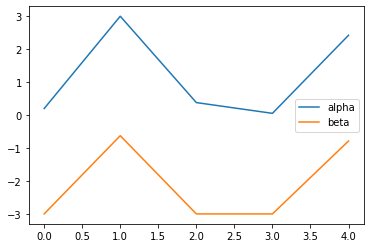

In [51]:
df['sub'] = df['alpha']-df['beta']
print(df)
for col in ('alpha','beta'):
    plt.plot(df[col], label=col)

plt.legend()
plt.show()